<a href="https://colab.research.google.com/github/mqquiroz/ICV513/blob/main/Espectral_Densidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Espectral: Estado de Mar sintético

In [26]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import math

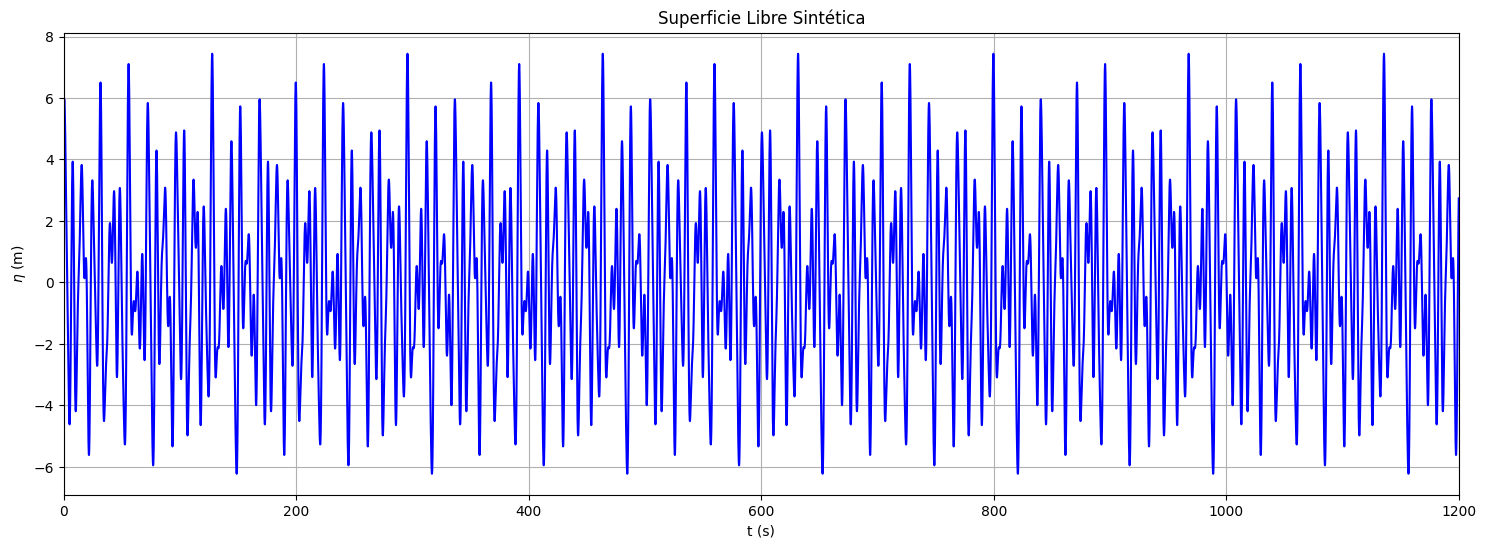

In [109]:
# Datos de registros individuales
H = [3.6, 5.2, 4.4, 2.4] #(m)
T = [14,    8,   6,   4] #(s)
deltai = [100,25,30,0.5]

#paso de tiempo
dt = 0.01 #(s)
#Tiempo total
T0 = 20*60 #(s) corresponde a 20 min

#tiempo de registro
t = np.arange(0,T0+dt,dt)

eta = 0
for i in range(len(H)):
  eta_i = (H[i]/2)*np.cos((2*np.pi/T[i])*t + deltai[i])
  eta = eta + eta_i

#Ruido gaussiano
r_gaussiano = 0 #20.5*np.squeeze(np.random.randn(1,len(eta)))  #sigma * np.random.randn(...)



alto  = 6
ancho = 18

plt.figure(1,figsize=(ancho,alto))

plt.plot(t,eta+r_gaussiano,'b')
plt.xlim(t[0],t[5000])
plt.xlim(t[0],t[-1])
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('$\eta$ (m)')
plt.title('Superficie Libre Sintética')
plt.show()

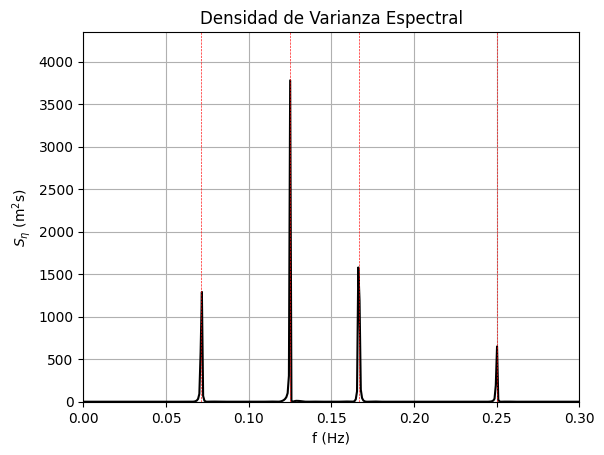

In [108]:
# Generacion del Espectro
N = len(t)
#Frecuencia de muestreo (Sampling Frequency)
fs = 1/dt
#Frecuencia de Nyquist
fmax = fs/2
#Ancho de banda de Frecuencia
df = 1/T0
fmin = df

#entrega la menor potencia de 2 que es mas grande o igual al número x.
def nextpow2(x):
  return math.ceil(np.log2(x))

NFFT = 2**nextpow2(N)

#Coeficientes de Fourier
C = np.fft.fft(eta+r_gaussiano,NFFT)
a = (2/N)*np.abs(C)

f = fmax*np.linspace(0,1,int(NFFT/2+1))
f = f[1::] # no consideramos el valor 0

Sn = 0.5*a[1:int(NFFT/2+1)]**2/df


plt.plot(f,Sn,'k')
plt.xlim(0,0.3)
plt.ylim(0,1.15*np.max(Sn))

for i in range(len(T)):
  plt.axvline(x=1/T[i],c='r',linestyle='--',linewidth= 0.45)

plt.xlabel('f (Hz)')
plt.ylabel('$S_{\eta}$ (m$^{2}$s)')
plt.title('Densidad de Varianza Espectral')
plt.grid()

plt.show()